In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Merged_Data.csv')

df = df[df['Composite Chart'].isin(['Yes', 'No'])]
df['Fig_number'] = pd.to_numeric(df['Fig number'], errors='coerce')

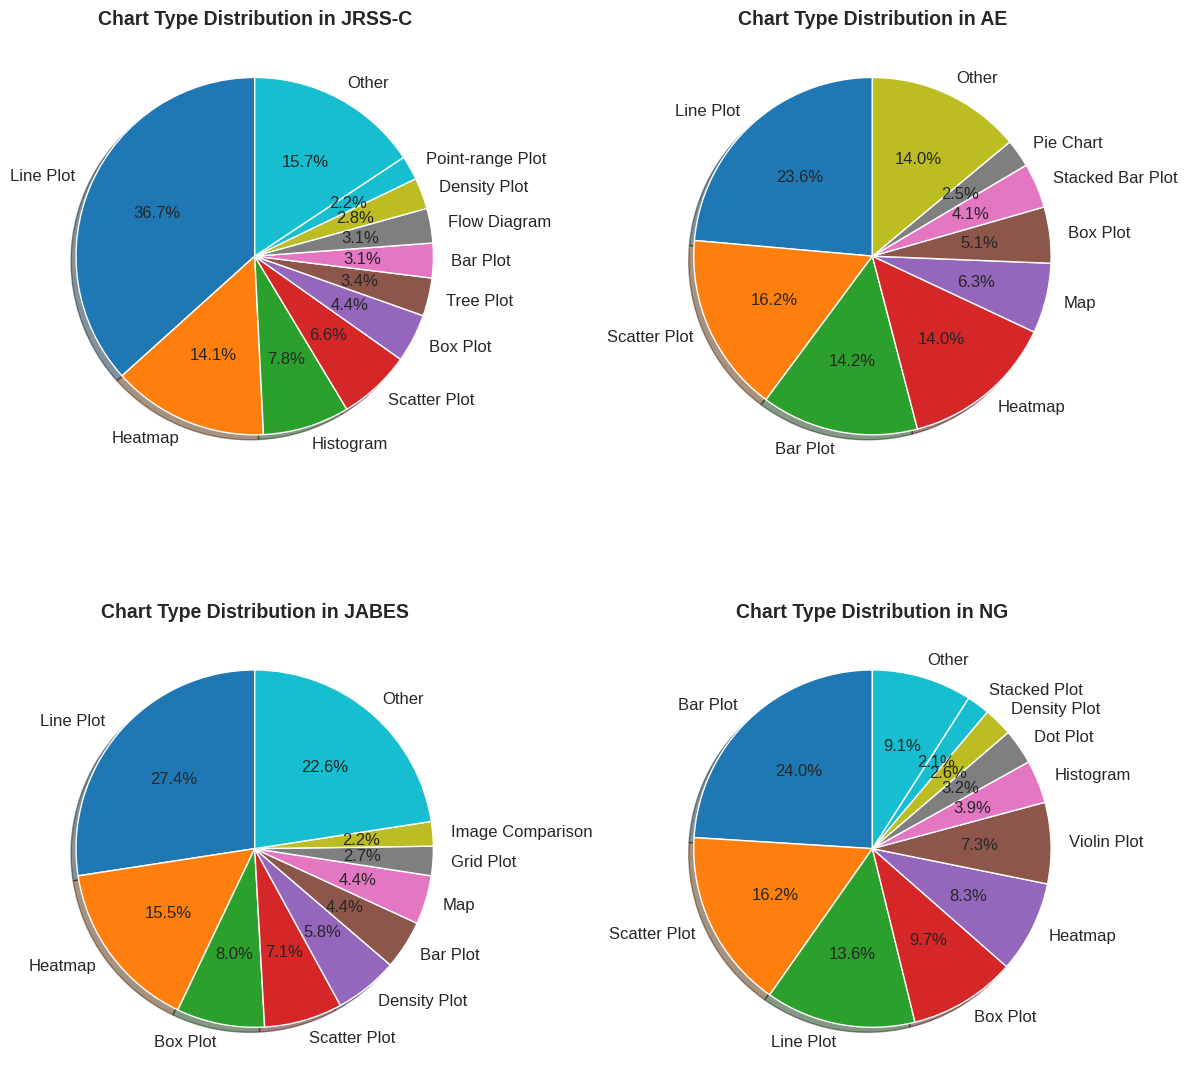

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Merged_Data.csv"
df = pd.read_csv(file_path)

df_cleaned = df[df["Type"].notna() & (df["Type"] != "None")]

journals = df_cleaned["Journal"].unique()

plt.style.use("seaborn-v0_8-whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, journal in enumerate(journals):
    if i >= 4: 
        break
    
    journal_data = df_cleaned[df_cleaned["Journal"] == journal]

    chart_counts = journal_data["Type"].value_counts()

    total = chart_counts.sum()
    chart_percentages = chart_counts / total

    chart_counts_filtered = chart_counts[chart_percentages >= 0.015]
    other_count = chart_counts[chart_percentages < 0.015].sum()

    if other_count > 0:
        chart_counts_filtered["Other"] = other_count

    colors = plt.colormaps['tab10'](range(len(chart_counts_filtered)))

    wedges, texts, autotexts = axes[i].pie(
        chart_counts_filtered, 
        labels=chart_counts_filtered.index, 
        autopct=lambda p: f'{p:.1f}%' if p >= 2 else '', 
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},  
        textprops={'fontsize': 12}, 
        shadow=True  
    )

    axes[i].set_title(f"Chart Type Distribution in {journal}", fontsize=14, fontweight="bold")

plt.tight_layout()

plt.show()


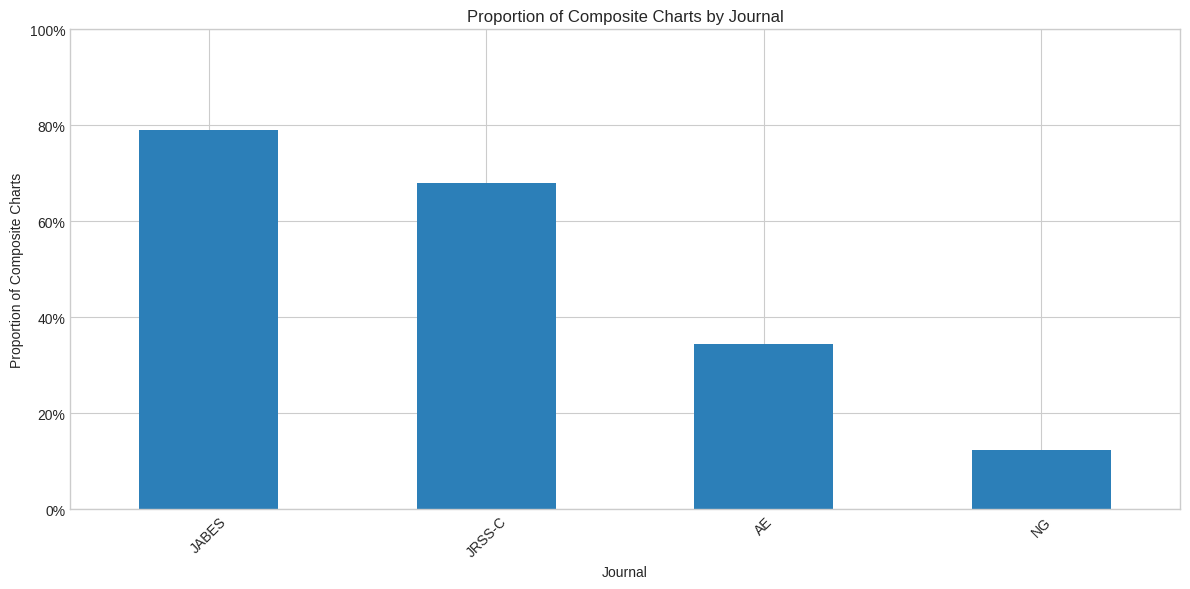

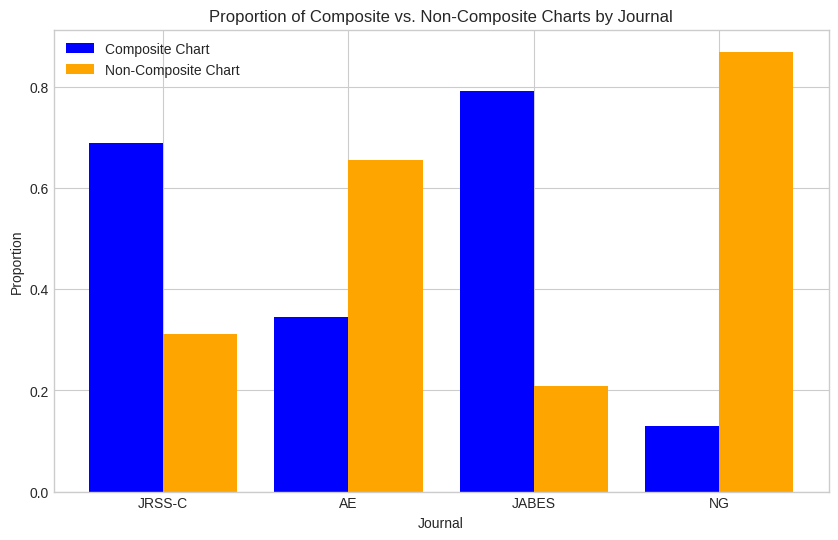

In [3]:
comp_ratio = df.groupby('Journal')['Composite Chart'].apply(
    lambda x: (x == 'Yes').sum() / x.count()  
).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
comp_ratio.plot(kind='bar', color='#2c7fb8')
plt.title('Proportion of Composite Charts by Journal')
plt.xlabel('Journal')
plt.ylabel('Proportion of Composite Charts')
plt.xticks(rotation=45)
plt.ylim(0, 1)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}")) 
plt.tight_layout()
plt.show()

import numpy as np


df_cleaned = df[df["Composite Chart"].notna() & (df["Composite Chart"] != "None")]


composite_ratios = {}

for journal in journals:
    journal_data = df_cleaned[df_cleaned["Journal"] == journal]
    composite_count = (journal_data["Composite Chart"] == "Yes").sum()
    non_composite_count = (journal_data["Composite Chart"] == "No").sum()
    total = composite_count + non_composite_count

    if total > 0:
        composite_ratios[journal] = {
            "Composite": composite_count / total,
            "Non-Composite": non_composite_count / total
        }

labels = list(composite_ratios.keys())
composite_values = [composite_ratios[j]["Composite"] for j in labels]
non_composite_values = [composite_ratios[j]["Non-Composite"] for j in labels]

x = np.arange(len(labels))
width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, composite_values, width, label="Composite Chart", color="blue")
plt.bar(x + width/2, non_composite_values, width, label="Non-Composite Chart", color="orange")

plt.xlabel("Journal")
plt.ylabel("Proportion")
plt.title("Proportion of Composite vs. Non-Composite Charts by Journal")
plt.xticks(ticks=x, labels=labels)
plt.legend()

plt.show()


In [4]:
import pandas as pd
from itertools import combinations
from collections import Counter


In [5]:
import pandas as pd
from itertools import combinations
from collections import Counter

file_path = "Merged_Data.csv" 
df = pd.read_csv(file_path)

df_cleaned = df[df["Type"].notna() & (df["Type"] != "None") & df["Composite Chart"].notna()]

df_composite = df_cleaned[df_cleaned["Composite Chart"] == "Yes"]

chart_combinations = []

for article in df_composite["Article_Lab"].unique():  
    article_data = df_composite[df_composite["Article_Lab"] == article]
    chart_types = list(article_data["Type"].unique())

    if len(chart_types) > 1: 
        chart_combinations.extend(combinations(sorted(chart_types), 2)) 

combination_counts = Counter(chart_combinations)

combination_df = pd.DataFrame(combination_counts.items(), columns=["Chart Combination", "Count"])
combination_df = combination_df.sort_values(by="Count", ascending=False)

print(combination_df.head(30)) 


                 Chart Combination  Count
9             (Heatmap, Line Plot)     28
13       (Line Plot, Scatter Plot)     24
16           (Bar Plot, Line Plot)     23
17        (Bar Plot, Scatter Plot)     19
11         (Heatmap, Scatter Plot)     19
5              (Box Plot, Heatmap)     18
8         (Box Plot, Scatter Plot)     17
15             (Bar Plot, Heatmap)     17
6            (Box Plot, Line Plot)     16
43            (Bar Plot, Box Plot)     14
26          (Histogram, Line Plot)     11
36                (Line Plot, Map)     11
24            (Heatmap, Histogram)     10
90       (Density Plot, Line Plot)     10
31                  (Heatmap, Map)      8
192   (Density Plot, Scatter Plot)      7
136       (Line Plot, Violin Plot)      6
27       (Histogram, Scatter Plot)      6
48        (Bar Plot, Stacked Plot)      6
128         (Heatmap, Violin Plot)      6
38             (Map, Scatter Plot)      5
45           (Bar Plot, Histogram)      5
22           (Box Plot, Histogram)

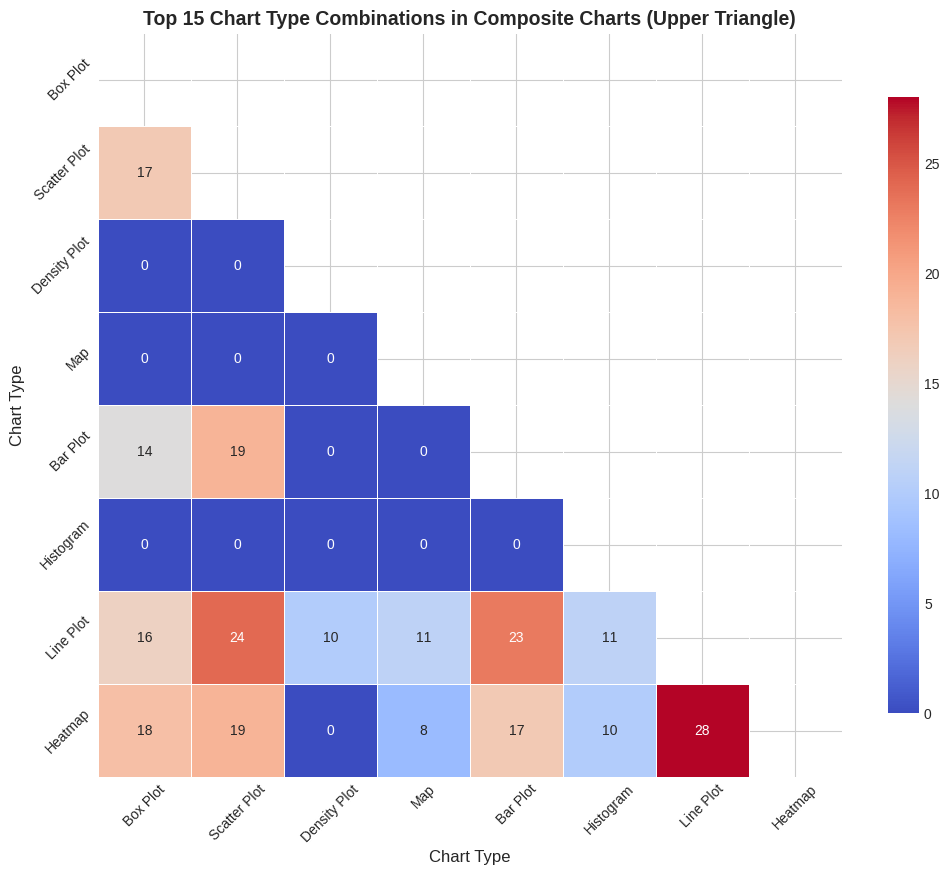

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter

# 读取 CSV 文件
file_path = "Merged_Data.csv"
df = pd.read_csv(file_path)

# 清理数据，去除 None 值
df_cleaned = df[df["Type"].notna() & (df["Type"] != "None") & df["Composite Chart"].notna()]

# 筛选出复合图表的数据
df_composite = df_cleaned[df_cleaned["Composite Chart"] == "Yes"]

# 统计复合图表中各类图表的组合出现频率
chart_combinations = []

for article in df_composite["Article_Lab"].unique():  # 遍历每篇文章
    article_data = df_composite[df_composite["Article_Lab"] == article]
    chart_types = list(article_data["Type"].unique())

    if len(chart_types) > 1:  # 只记录真正的复合图表（包含多个不同的图表类型）
        chart_combinations.extend(combinations(sorted(chart_types), 2))  # 记录所有两两组合

# 计算组合出现的次数
combination_counts = Counter(chart_combinations)

# 转换为 DataFrame 方便展示
combination_df = pd.DataFrame(combination_counts.items(), columns=["Chart Combination", "Count"])
combination_df = combination_df.sort_values(by="Count", ascending=False)

# 取出现频率前15的组合
top_n = 15
top_combinations = combination_df.head(top_n)

# 提取唯一的图表类型
chart_types = list(set([t for pair in top_combinations["Chart Combination"] for t in pair]))

# 创建空的热力图矩阵
heatmap_matrix = pd.DataFrame(0, index=chart_types, columns=chart_types)

# 填充矩阵
for (chart1, chart2), count in zip(top_combinations["Chart Combination"], top_combinations["Count"]):
    heatmap_matrix.loc[chart1, chart2] = count
    heatmap_matrix.loc[chart2, chart1] = count  # 确保对称性

# 创建掩码，仅显示上三角部分，避免对称重复数据
mask = np.triu(np.ones_like(heatmap_matrix, dtype=bool), k=0)

# 绘制美化后的热力图
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".0f", 
    cmap="coolwarm",  # 更加直观的配色方案
    linewidths=0.7,   # 适度加粗网格线，提高可视化效果
    cbar_kws={"shrink": 0.8},  # 调整颜色条大小
    square=True  # 保持单元格方形
)

# 增强标题和标签的可读性
plt.title("Top 15 Chart Type Combinations in Composite Charts (Upper Triangle)", fontsize=14, fontweight='bold')
plt.xlabel("Chart Type", fontsize=12)
plt.ylabel("Chart Type", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()


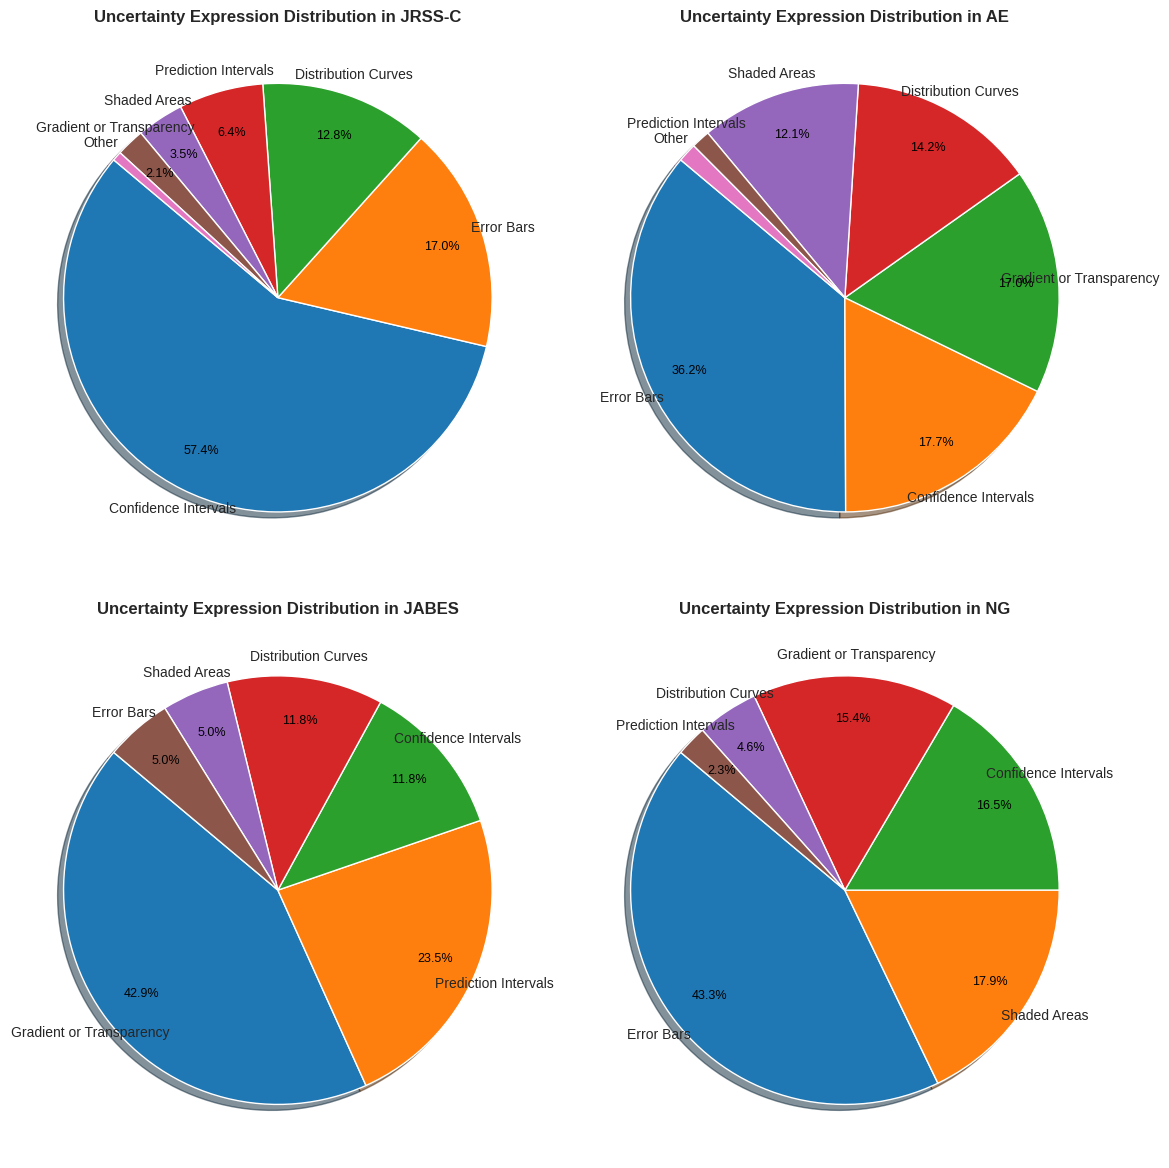

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter

file_path = "Merged_Data.csv"
df = pd.read_csv(file_path)

df_uncertainty = df[df["Uncertainty Type"].notna() & (df["Uncertainty Type"] != "None")]

plt.style.use("seaborn-v0_8-whitegrid")

journals = df_uncertainty["Journal"].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, journal in enumerate(journals):
    if i >= 4: 
        break
    
    journal_data = df_uncertainty[df_uncertainty["Journal"] == journal]

    uncertainty_counts = journal_data["Uncertainty Type"].value_counts()

    total = uncertainty_counts.sum()
    uncertainty_percentages = uncertainty_counts / total

    uncertainty_counts_filtered = uncertainty_counts[uncertainty_percentages >= 0.01]
    other_count = uncertainty_counts[uncertainty_percentages < 0.01].sum()

    if other_count > 0:
        uncertainty_counts_filtered["Other"] = other_count

    colors = plt.colormaps['tab10'](range(len(uncertainty_counts_filtered)))

    wedges, texts, autotexts = axes[i].pie(
        uncertainty_counts_filtered, 
        labels=uncertainty_counts_filtered.index, 
        autopct=lambda p: f'{p:.1f}%' if p >= 2 else '',  # 仅显示大于2%的标签
        startangle=140, 
        colors=colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},  
        shadow=True,
        pctdistance=0.8  
    )

    # 美化标签
    for text in texts:
        text.set_fontsize(10)
        text.set_horizontalalignment('center')
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('black')

    axes[i].set_title(f"Uncertainty Expression Distribution in {journal}", fontsize=12, fontweight="bold")

plt.tight_layout()

plt.show()

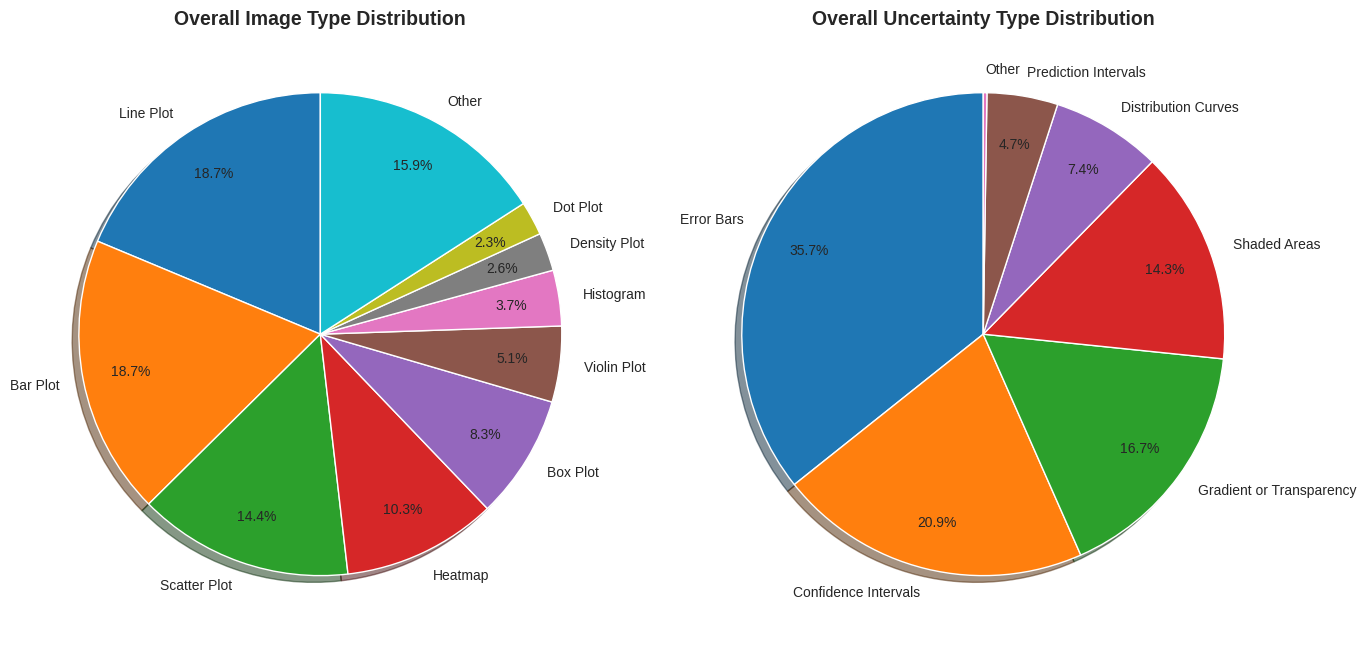

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter

file_path = "Merged_Data.csv"
df = pd.read_csv(file_path)

df_cleaned = df[df["Type"].notna() & (df["Type"] != "None")]
df_uncertainty = df[df["Uncertainty Type"].notna() & (df["Uncertainty Type"] != "None")]

plt.style.use("seaborn-v0_8-whitegrid")

image_type_counts = df_cleaned["Type"].value_counts()
total_images = image_type_counts.sum()
image_type_percentages = image_type_counts / total_images

image_type_filtered = image_type_counts[image_type_percentages >= 0.015]
other_count = image_type_counts[image_type_percentages < 0.015].sum()
if other_count > 0:
    image_type_filtered["Other"] = other_count

uncertainty_counts = df_uncertainty["Uncertainty Type"].value_counts()
total_uncertainty = uncertainty_counts.sum()
uncertainty_percentages = uncertainty_counts / total_uncertainty

uncertainty_filtered = uncertainty_counts[uncertainty_percentages >= 0.015]
other_uncertain = uncertainty_counts[uncertainty_percentages < 0.015].sum()
if other_uncertain > 0:
    uncertainty_filtered["Other"] = other_uncertain

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

colors1 = plt.colormaps['tab10'](range(len(image_type_filtered)))
colors2 = plt.colormaps['tab10'](range(len(uncertainty_filtered)))

wedges1, texts1, autotexts1 = axes[0].pie(
    image_type_filtered, 
    labels=image_type_filtered.index, 
    autopct=lambda p: f'{p:.1f}%' if p >= 2 else '',
    startangle=90, 
    colors=colors1, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    shadow=True, 
    pctdistance=0.8
)
axes[0].set_title("Overall Image Type Distribution", fontsize=14, fontweight="bold")

wedges2, texts2, autotexts2 = axes[1].pie(
    uncertainty_filtered, 
    labels=uncertainty_filtered.index, 
    autopct=lambda p: f'{p:.1f}%' if p >= 2 else '',
    startangle=90, 
    colors=colors2, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    shadow=True, 
    pctdistance=0.8
)
axes[1].set_title("Overall Uncertainty Type Distribution", fontsize=14, fontweight="bold")

plt.tight_layout()

plt.show()


         Total Articles  Total Figures  Avg Figures per Article
Journal                                                        
AE                   53            394                 7.433962
JABES                41            226                 5.512195
JRSS-C               14            319                22.785714
NG                   25           1878                75.120000


/tmp/ipykernel_278/1949763643.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_stats.index, y=overall_stats["Total Articles"], ax=axes[0], palette="Blues")
/tmp/ipykernel_278/1949763643.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_278/1949763643.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_stats.index, y=overall_stats["Total Figures"], ax=axes[1], palette="Greens")
/tmp/ipykernel_278/1949763643.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after

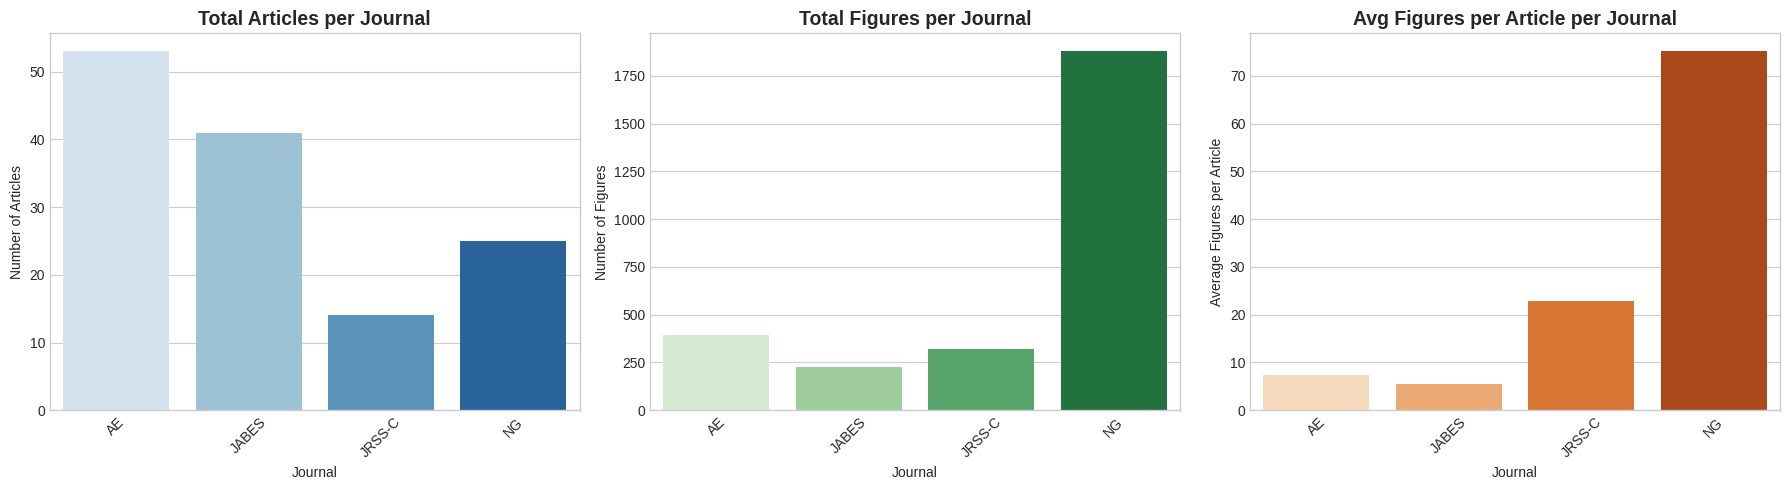

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter

file_path = "Merged_Data.csv"
df = pd.read_csv(file_path)

df_cleaned = df[df["Type"].notna() & (df["Type"] != "None")]

total_articles = df_cleaned.groupby("Journal")["Article_Lab"].nunique()

total_figures = df_cleaned.groupby("Journal")["Figure"].count()

avg_figures_per_article = total_figures / total_articles

overall_stats = pd.DataFrame({
    "Total Articles": total_articles,
    "Total Figures": total_figures,
    "Avg Figures per Article": avg_figures_per_article
})

print(overall_stats)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=overall_stats.index, y=overall_stats["Total Articles"], ax=axes[0], palette="Blues")
axes[0].set_title("Total Articles per Journal", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Number of Articles")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(x=overall_stats.index, y=overall_stats["Total Figures"], ax=axes[1], palette="Greens")
axes[1].set_title("Total Figures per Journal", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Number of Figures")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.barplot(x=overall_stats.index, y=overall_stats["Avg Figures per Article"], ax=axes[2], palette="Oranges")
axes[2].set_title("Avg Figures per Article per Journal", fontsize=14, fontweight="bold")
axes[2].set_ylabel("Average Figures per Article")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()